### Grupo B04
### Miguel Egido Morales, Alfredo Robledano Abasolo, Ana Robledano Abasolo


# P1 AA Configuración y Entrenamiento de una Red de Neuronas

Utilizaremos la **biblioteca Python Keras** para **clasificar** artículos de ropa.

**PROBLEMA:**
- Clasificación de imágenes en escala de grises de prendas de ropa (28 x 28 píxeles) en sus 10 categorías (de 0 a 9)
- Usaremos 60K imágenes de entrenamiento y más de 10K imágenes de prueba
- El conjunto de datos MNIST está precargado en Keras en la forma de un conjunto de cuatro matrices Numpy
- Algunas muestras
- Tenemos las siguientes categorías o **clases** del problema de clasificación de ropa: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot.
- Los "puntos de datos" son **muestras**
- La clase asociado a una muestra específica se llama **etiqueta**

Importamos el paquete tensorflow que contiene a la librería keras

In [1]:
import tensorflow as tf
tf.__version__ >= '2.0.0'  # Comprobamos que estamos usando al menos la versión 2.0.0

True

El módulo keras.datasets contiene un dataset con imágenes de ropa que usaremos para este proyecto\
Las imágenes se encuentran convenientemente etiquetadas y en formato mnist\
A continuación almacenamos en memoria las imágenes de entrenamiento  e imágenes de test (junto con sus etiquetas)

In [2]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(type(train_images), train_images.shape, train_labels.shape)
print(type(test_images), test_images.shape, test_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
<class 'numpy.ndarray'> (60000, 28, 28) (60000,)
<class 'numpy.ndarray'> (10000, 28, 28) (10000,)


Observamos que train_images y test_images son numpy.arrays de 3 dimensiones\
60_000 imágenes de 28x28 pixels para el entrenamiento (60_000 etiquetas)\
10_000 imágenes de 28x28 pixels para test (10_000 etiquetas)

Comprobamos que las etiquetas van de 0 a 9

In [3]:
print(set(train_labels))
print(set(test_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


Echemos un vistazo a alguna imagen del set de entrenamiento (son numpy arrays 2D)\
Por ejemplo la número 30_000\
Para ello importamos numpy, de forma que podamos cambiar las opciones de impresión

In [4]:
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[30_000]))

[[  0   0   0   0   0   0   0   0   0   0 118 204 181 175 213 199 168 197 111   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 173 225 185 179 225 158 142 227 173   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 170 229 226 226 233 151 167 234 158   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 194 222 212 226 222 240 218 230 163   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 198 222 210 207 211 207 208 231 147   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 188 220 209 210 211 215 208 230 144   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 214 220 212 220 213 239 158   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 217 216 215 219 216 238 160   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 185 231 218 221 215 218 214 238 170   

A simple vista ningún problema\
Los valores de la matriz 2D asociada a la imagen están entre 0 y 255.\
Podemos ver su etiqueta asociada, 3.

In [5]:
print(train_labels[30_000])

3


Viendo la documentación sabemos que se trata de un vestido por ser el valor 3. (3: Dress)\
No obstante podemos usar el paquete matplotlib para ver como es la imagen

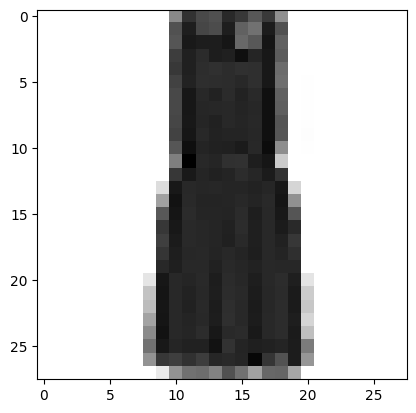

In [6]:
import matplotlib.pyplot as plt
ropa = train_images[30000]
plt.imshow(ropa, cmap=plt.cm.binary) # el num más bajo se pone en color blanco, y el más alto en negro
plt.show()

Abrimos también una imagen del set de test.

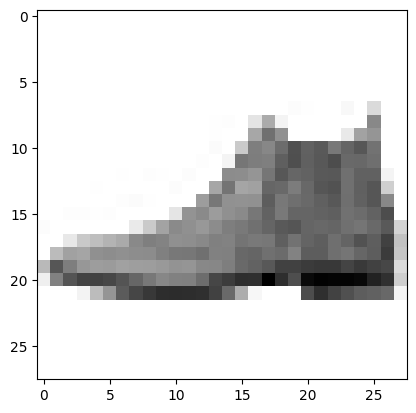

In [7]:
import matplotlib.pyplot as plt
ropa = test_images[0]
plt.imshow(ropa, cmap=plt.cm.binary) # Veamos el elemento 0 del set de tests y pintémoslo con matplotlib
plt.show()

Un zapato, no cabe duda

In [8]:
print(test_labels[0])

9


Así lo indica su etiqueta (9: shoe)


La función de keras keras.layers.Flatten() nos podría ser útil para aplanar la entrada .... (falta info)

## Cuestiones

### 1. Configurar y entrenar los siguientes modelos de red de neuronas

A continuación establecemos los parámetros de configuración solicitados\
Utilizaremos namedtuples como contenedores de las configuraciones\
Nota: Las configuraciones de este tipo recomendaríamos tenerlas en un script aparte

In [9]:
from collections import namedtuple

neuronas_capa1 = (10, 10, 10, 10, 512, 512, 512, 512)
funcion_activacion = ("relu", "relu", "sigmoid", "sigmoid", "relu", "relu", "sigmoid", "sigmoid")
optimizador = ("sgd", "rmsprop", "sgd", "rmsprop", "sgd", "rmsprop", "sgd", "rmsprop")

param_rn = namedtuple("Param_RN",
                      ["neuronas_capa1","funcion_activacion","optimizador"])

rn_configs = [param_rn(*params) for params in zip(neuronas_capa1,
                                                  funcion_activacion,
                                                  optimizador)]
print(rn_configs[0]) # vistazo a una de las configuraciones

Param_RN(neuronas_capa1=10, funcion_activacion='relu', optimizador='sgd')


Adicionalmente se utilizará:
* función de perdida 'categorical_crossentropy'
* métrica de precisión
* 5 épocas

**CONSTRUIMOS LA RNA**
- **Capa** (**layers**) es el **componente básico de las redes neuronales**. => Es un **filtro** de datos (módulo de procesamiento de datos).Entran datos y salen con una forma más útil para el objetivo del problema a resolver. => **Destilación de datos**
    - Las capas extraen **representaciones**  de los datos introducidos en ellas, que deberían ser más significativas para el problema en cuestión.

Utilizaremos capas densas (cada neurona está conectada a todas las demás de esa capa).\
Cada capa aplica unas cuantas operaciones con tensores sencillas a los datos
de entrada, y que estas operaciones implican tensores de pesos. Los tensores
de peso, que son los atributos de las capas, son donde persiste el
"conocimiento" de la red.
En general, la capa de salida de una red de clasificación tendrá tantas
neuronas como clases, menos en la clasificación binaria, que con 1 vale. Cada
valor será la probabilidad de que la imagen del dígito actual pertenezca a cada
una de las clases





In [12]:
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
from keras import models  # importamos de keras las librerías de modelos y de capas (layers)
from keras import layers

# El tipo de modelo para nuestras redes será secuencial
# Las redes constarán de dos capas densas
# La primera contiene el número de neuronas y su función de activación (ambos especificados en el enunciado)
# La segunda contiene 10 neuronas (una para cada tipo de ropa) y función de activación softmax
# Esta última capa nos servirá para saber como de bien lo ha hecho la red, al devolvernos una matriz de 10 puntuaciones de probabilidad (sumando 1)
# La puntuación será la probabilidad de que la imagen pertenezca a una de nuestras clases de 10 tipos de prendas.
networks = []
for config in rn_configs:
  network = models.Sequential()
  # Primera capa (configuración enunciado)
  network.add(layers.Dense(config.neuronas_capa1,
                           activation=config.funcion_activacion,
                           input_shape=(28*28,)))
  # Segunda capa (10 neuronas y softmax)
  network.add(layers.Dense(10, activation='softmax'))
  networks.append(network)

# Por ejemplo, vemos la primera network de nuestra lista de networks
networks[0].summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                7850      
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Observamos que para la primera red neuronal (**networks[0]**), tenemos un total de 7960 parámetros\
Keras nos devuelve el número de parámetros que se calcula como:\
**nº parámetros capa densa = nº de neuronas x nº de entradas + sesgos**
* **Capa 1:** 10 x 784 + 10 = 7850
* **Capa 2:** 10 x 10 + 10 = 110
* **Total:**  7850 + 110 = 7960

Para que preparar la red, debemos elegir:
- Una **función de pérdida**: utilizaremos la función de pérdida `categorical_crossentropy` que mide la discrepancia entre las predicciones de un modelo y las respuestas reales en problemas de clasificación con múltiples categorías. Calcula la diferencia entre las distribuciones de probabilidad predichas y las verdaderas, utilizando la entropía cruzada como métrica.

- Un **optimizador**: este es el mecanismo a través del cual la red se actualizará en función de los datos que ve y su función de pérdida. (Lo veremos en detalle más adelante)
- **Métricas** para monitorizar durante el entrenamiento y las pruebas. Solo nos preocuparemos por la **precisión** `accuracy` (la fracción de las imágenes que fueron clasificado).